# Cài đặt thư viện cần thiết (selenium, tslearn)

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 7.3 MB/s 
     |████████████████████████████████| 384 kB 7.1 MB/s 
     |████████████████████████████████| 140 kB 47.5 MB/s 
     |████████████████████████████████| 58 kB 3.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.downloa

In [ ]:
!pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 7.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.7.2 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 7.1 MB/s 


# Câu 1

##Import thư viện

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
import random
import time
import pandas as pd
import os

##Hàm xử lý tác vụ

In [ ]:
'''
  Hàm tìm tất cả các element
  Đầu vào là source truy vấn, kiểu truy vấn (by) và lệnh truy vấn (query)
'''
def find_elements(source,by,query):
    element = WebDriverWait(source, 10).until(EC.presence_of_all_elements_located((by, query)))
    return element

In [ ]:
'''
  Lấy dữ liệu của 100 stock ban đầu
'''
def get_100_stock():
    list_items = find_elements(drive,By.CSS_SELECTOR,'.SPTable>tbody>tr:nth-child(n+3) td:nth-child(4)')
    code = [item.text for item in list_items]
    random_list = [code[i] for i in range(100)]
    return random_list

In [ ]:
'''
  Link chuyển hướng đến thong tin của stock để bắt đầu crawl
'''
def link_price_symbol(symbol):
    return f"https://www.stockbiz.vn/Stocks/{symbol}/HistoricalQuotes.aspx"

In [ ]:
'''
  Kiểm tra phải bắt đầu từ năm 2020
  Định dạng theo kiểu của trang web stock
'''

def is_2020(label):
    return (label == 'Tháng Giêng 2020')

In [ ]:
'''
  Lựa chọn thời gian cần crawl trên calender của mỗi stock
  Ở đây lựa chọn đầu năm 2020 tới thời điểm hiện tại
'''
def calender_selector(driver):
    calenderBtn = find_elements(driver,By.CLASS_NAME,'ss-calendarbutton')[0]
    calenderBtn.click()

    calenderTable = find_elements(driver,By.ID,'ctl00_webPartManager_wp1770166562_wp1427611561_dtStartDate_calendar_CalendarTable')[0]

    days = None
    cond = True
    while cond:
        header = find_elements(calenderTable,By.CSS_SELECTOR,'#ctl00_webPartManager_wp1770166562_wp1427611561_dtStartDate_calendar_CalendarTable>tbody>tr:first-child td:first-child')[0]
        headerTitle = find_elements(calenderTable,By.CSS_SELECTOR,'table>tbody>tr:first-child td:nth-child(2)')[0]

        if is_2020(headerTitle.text):
            container = find_elements(calenderTable,By.CSS_SELECTOR,'#ctl00_webPartManager_wp1770166562_wp1427611561_dtStartDate_calendar_CalendarTable>tbody>tr:last-child td:first-child')[0]
            contentTable = find_elements(container,By.CLASS_NAME,'ss-calendarmonth')[0]

            days = find_elements(contentTable,By.CSS_SELECTOR,'tbody>tr:nth-child(n+1) td')
            cond = False
        else:
            prev = find_elements(header,By.CSS_SELECTOR,'table>tbody>tr:first-child td:nth-child(1)')[0]
            prev.click()


    for j in days:
        if j.text == '1':
            j.click()
            break

    btnSubmit = find_elements(driver,By.ID,'ctl00_webPartManager_wp1770166562_wp1427611561_btnView')[0]
    btnSubmit.click()

##Cài đặt options của Webdriver Chrome

In [ ]:
'''
  Cài đặt các option của chrome driver dẫn đến đường dẫn url
'''
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

drive = webdriver.Chrome('chromedriver',options=chrome_options)

url = 'https://quotes.vcbs.com.vn/a/exchange.html?symbol=HSX'
drive.implicitly_wait(10)
drive.get(url)

##Crawl dữ liệu 100 Stock và Closing Price 2020 - 2022

In [ ]:
list_symbol_stock = get_100_stock() #lấy dữ liệu 100 stock symbols
print(list_symbol_stock)

['AAT', 'ABR', 'ABS', 'ABT', 'ACB', 'ACC', 'ACG', 'ACL', 'ADG', 'ADS', 'AGG', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'APH', 'ASG', 'ASM', 'ASP', 'AST', 'BAF', 'BBC', 'BCE', 'BCG', 'BCM', 'BFC', 'BHN', 'BIC', 'BID', 'BKG', 'BMC', 'BMI', 'BMP', 'BRC', 'BSI', 'BTP', 'BTT', 'BVH', 'BWE', 'C32', 'C47', 'CAV', 'CCI', 'CCL', 'CDC', 'CHP', 'CIG', 'CII', 'CKG', 'CLC', 'CLL', 'CLW', 'CMG', 'CMV', 'CMX', 'CNG', 'COM', 'CRC', 'CRE', 'CSM', 'CSV', 'CTD', 'CTF', 'CTG', 'CTI', 'CTR', 'CTS', 'CVT', 'D2D', 'DAG', 'DAH', 'DAT', 'DBC', 'DBD', 'DBT', 'DC4', 'DCL', 'DCM', 'DGC', 'DGW', 'DHA', 'DHC', 'DHG', 'DHM', 'DIG', 'DLG', 'DMC', 'DPG', 'DPM', 'DPR', 'DQC', 'DRC', 'DRH', 'DRL', 'DSN', 'DTA', 'DTL', 'DTT']


In [ ]:
df_list = []
for i in list_symbol_stock: #sử dụng từng stock symbols để crawls
    df = None
    url_history = link_price_symbol(i) #setup link stock
    drive.get(url_history)

    print(f"Đang crawl dữ liệu của {i}")

    calender_selector(drive) #setup calender

    time.sleep(2)  #dừng 2 giây tránh chưa load kịp dữ liệu calender
    dataframe = []

    cond = True
    while cond: #vòng lặp đến khi crawls hết dữ liệu
        data = find_elements(drive,By.CSS_SELECTOR,'.dataTable>tbody>tr:nth-child(n+1)')
        for d in data[1:]:
            text = d.text
            if '0,00 / 0,00%' in text: #fit text về đúng dữ liệu để xử lý
                text = text.replace('0,00 / 0,00%','0,00/0,00%')
            splits = text.split()[:-2]
            dataframe.append(splits) #thêm toàn bộ vào dataframe

        isNext = False
        pageNavigation = find_elements(drive,By.CLASS_NAME,'pageNavigation')[0] #lấy dữ liệu pagination
        drive.implicitly_wait(10)
        linkNext = find_elements(pageNavigation,By.TAG_NAME,'a')

        for l in linkNext:
            if l.text == 'Tiếp »':# kiểm tra xem đã tới dữ liệu cuối chưa
                isNext = True
                l.click()
                time.sleep(2)
                break

        if not isNext:
            cond = False

    df = pd.DataFrame(dataframe,columns=['Ngày','Thay đổi','Mở cửa','Cao nhất','Thấp nhất','Đóng cửa','Trung bình'])
    df_list.append(df)

Đang crawl dữ liệu của AAT
Đang crawl dữ liệu của ABR
Đang crawl dữ liệu của ABS
Đang crawl dữ liệu của ABT
Đang crawl dữ liệu của ACB
Đang crawl dữ liệu của ACC
Đang crawl dữ liệu của ACG
Đang crawl dữ liệu của ACL
Đang crawl dữ liệu của ADG
Đang crawl dữ liệu của ADS
Đang crawl dữ liệu của AGG
Đang crawl dữ liệu của AGM
Đang crawl dữ liệu của AGR
Đang crawl dữ liệu của AMD
Đang crawl dữ liệu của ANV
Đang crawl dữ liệu của APC
Đang crawl dữ liệu của APG
Đang crawl dữ liệu của APH
Đang crawl dữ liệu của ASG
Đang crawl dữ liệu của ASM
Đang crawl dữ liệu của ASP
Đang crawl dữ liệu của AST
Đang crawl dữ liệu của BAF
Đang crawl dữ liệu của BBC
Đang crawl dữ liệu của BCE
Đang crawl dữ liệu của BCG
Đang crawl dữ liệu của BCM
Đang crawl dữ liệu của BFC
Đang crawl dữ liệu của BHN
Đang crawl dữ liệu của BIC
Đang crawl dữ liệu của BID
Đang crawl dữ liệu của BKG
Đang crawl dữ liệu của BMC
Đang crawl dữ liệu của BMI
Đang crawl dữ liệu của BMP
Đang crawl dữ liệu của BRC
Đang crawl dữ liệu của BSI
Đ

##Lưu dữ liệu với dạng CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
  tắt webdriver sau khi đã crawl dữ liệu
  Lưu dữ liệu vào nhiều file csv
'''


drive.quit()
folder = '/content/drive/MyDrive/Data Mining/dataset'
if not os.path.isdir(folder): #kiểm tra folder tồn tại chưa
    os.mkdir(folder) #tạo folder nếu chưa có

for i in range(len(df_list)):
    path = f"{folder}/{list_symbol_stock[i]}_2020-2022.csv"
    if os.path.isfile(path): #kiểm tra xem file đã tồn tại chưa
        os.remove(path) # xoá file nếu đã tồn tại
    df_list[i].to_csv(path,index=False,encoding='utf-8') #chuyển dataframe về file csv

# Câu 2



---

##Import thư viện và data

---



In [ ]:
import pandas as pd
import numpy as np
import os

import math as m
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
series = None
prices = []

path = '/content/drive/MyDrive/Data Mining/dataset'
list_path = os.listdir(path) #đọc tất cả file trong path

for i in range(5):
    file_csv = f"{path}/{list_path[i]}" #tên file
    stock_name = list_path[i].split('_')[0] #Lấy name của stock

    df = pd.read_csv(file_csv, header=0, index_col=0) #đọc file csv
    df.rename(columns={'Đóng cửa':stock_name}, inplace=True) #rename columns price thành stock symbols
    data = df[stock_name] #lấy giá trị price

    prices.append(data)

In [ ]:
series = pd.DataFrame(prices) #tạo dataframe từ 5 stock
series.head()

Ngày,20/12/2022,19/12/2022,16/12/2022,15/12/2022,14/12/2022,13/12/2022,12/12/2022,09/12/2022,08/12/2022,07/12/2022,...,15/01/2020,14/01/2020,13/01/2020,10/01/2020,09/01/2020,08/01/2020,07/01/2020,06/01/2020,03/01/2020,02/01/2020
AAT,"4,98","5,19","5,30","5,60","5,64","5,60","5,80","5,90","5,79","5,73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABR,"9,33","8,72","8,72","8,72","9,36","9,36","9,36","9,36","9,36","10,05",...,"16,00","13,60","13,60","13,60","13,40","13,90","13,70","14,10","13,80","12,10"
ABS,"5,98","6,40","6,38","6,38","6,39","6,20","6,43","6,38","6,40","6,36",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABT,"34,70","37,25","37,25","37,25","37,25","34,85","34,85","37,45","37,45","36,35",...,"33,20","34,40","34,40","36,95","36,00","36,00","36,00","34,00","34,00","33,70"
ACB,"22,55","22,75","23,00","23,20","23,15","23,05","22,50","23,05","22,65","22,30",...,"23,30","23,50","22,90","22,70","22,40","22,10","22,50","22,50","23,00","23,00"


##Tiền xử lý dữ liệu


In [ ]:
series.info #chi tiết của dataframe

<bound method DataFrame.info of Ngày 20/12/2022 19/12/2022 16/12/2022 15/12/2022 14/12/2022 13/12/2022  \
AAT        4,98       5,19       5,30       5,60       5,64       5,60   
ABR        9,33       8,72       8,72       8,72       9,36       9,36   
ABS        5,98       6,40       6,38       6,38       6,39       6,20   
ABT       34,70      37,25      37,25      37,25      37,25      34,85   
ACB       22,55      22,75      23,00      23,20      23,15      23,05   

Ngày 12/12/2022 09/12/2022 08/12/2022 07/12/2022  ... 15/01/2020 14/01/2020  \
AAT        5,80       5,90       5,79       5,73  ...        NaN        NaN   
ABR        9,36       9,36       9,36      10,05  ...      16,00      13,60   
ABS        6,43       6,38       6,40       6,36  ...        NaN        NaN   
ABT       34,85      37,45      37,45      36,35  ...      33,20      34,40   
ACB       22,50      23,05      22,65      22,30  ...      23,30      23,50   

Ngày 13/01/2020 10/01/2020 09/01/2020 08/01/2020

In [ ]:
'''
  Có 2 stock có price == NaN cho biết tại không có price tại khoảng thời gian đó
  Cần được drop các khoảng thời gian để clean dữ liệu
'''
series = series.dropna(axis=1) #drop giá trị NaN theo cột
series.head(5)

Ngày,20/12/2022,19/12/2022,16/12/2022,15/12/2022,14/12/2022,13/12/2022,12/12/2022,09/12/2022,08/12/2022,07/12/2022,...,09/04/2021,08/04/2021,07/04/2021,06/04/2021,05/04/2021,02/04/2021,01/04/2021,26/03/2021,25/03/2021,24/03/2021
AAT,"4,98","5,19","5,30","5,60","5,64","5,60","5,80","5,90","5,79","5,73",...,"14,10","13,20","13,50","13,45","12,60","13,00","13,40","11,35","12,20","12,70"
ABR,"9,33","8,72","8,72","8,72","9,36","9,36","9,36","9,36","9,36","10,05",...,"24,60","24,80","24,90","24,90","24,60","24,60","26,20","27,20","27,20","27,60"
ABS,"5,98","6,40","6,38","6,38","6,39","6,20","6,43","6,38","6,40","6,36",...,"54,90","53,80","52,00","50,70","50,00","49,30","48,00","43,50","43,00","42,50"
ABT,"34,70","37,25","37,25","37,25","37,25","34,85","34,85","37,45","37,45","36,35",...,"30,80","30,20","30,20","30,40","30,40","30,50","30,80","30,40","30,50","30,80"
ACB,"22,55","22,75","23,00","23,20","23,15","23,05","22,50","23,05","22,65","22,30",...,"34,40","34,40","34,40","34,75","34,75","34,65","33,85","32,45","32,05","32,45"


In [ ]:
stock_name = series.index.values #lấy stock name
print(stock_name)

['AAT' 'ABR' 'ABS' 'ABT' 'ACB']


In [ ]:
series = series.replace(',','.',regex=True).astype(float) #fit tiêu chuẩn ',' -> '.' để transfer thành số
columns_name = series.columns #lấy ngày

data = [[]]*5
for i in range(len(data)):
    data[i] = series.iloc[i].values

print(data[0][:100])

[ 4.98  5.19  5.3   5.6   5.64  5.6   5.8   5.9   5.79  5.73  6.16  6.16
  6.05  6.27  5.9   5.55  5.28  4.94  4.8   5.13  5.2   4.9   4.95  5.
  4.9   5.07  5.45  5.86  6.3   6.05  6.1   6.41  6.89  7.4   7.55  7.57
  7.69  7.51  7.02  7.    7.2   6.8   7.25  7.79  7.88  7.89  7.79  8.2
  8.25  7.8   7.79  8.37  8.37  9.    9.23  9.35  9.4   9.5   9.5   9.6
  9.9  10.   10.7  10.7  10.85 11.   10.6  11.35 11.4  11.   11.15 11.2
 11.   11.15 11.4  11.45 11.55 11.65 11.75 11.8  12.2  12.5  12.65 12.25
 11.45 11.9  12.2  12.75 13.1  13.45 13.8  13.8  13.9  13.5  13.3  13.4
 13.4  12.65 12.3  12.15]


##Normalizing dữ liệu bằng TimeSeriesScalerMeanVariance

In [ ]:
'''
  sử dụng time series scaler mean variance
  mean (trung bình) = 0. và standard (độ lệch chuẩn) 1.
'''
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
dataset = scaler.fit_transform(data)

In [ ]:
print(dataset[0][:10]) #kết quả sau khi scaler

[[-2.03542422]
 [-1.99229978]
 [-1.96971079]
 [-1.90810446]
 [-1.89989028]
 [-1.90810446]
 [-1.86703357]
 [-1.84649812]
 [-1.86908711]
 [-1.88140838]]


## Vẽ đồ thị trước và sau Normalizing

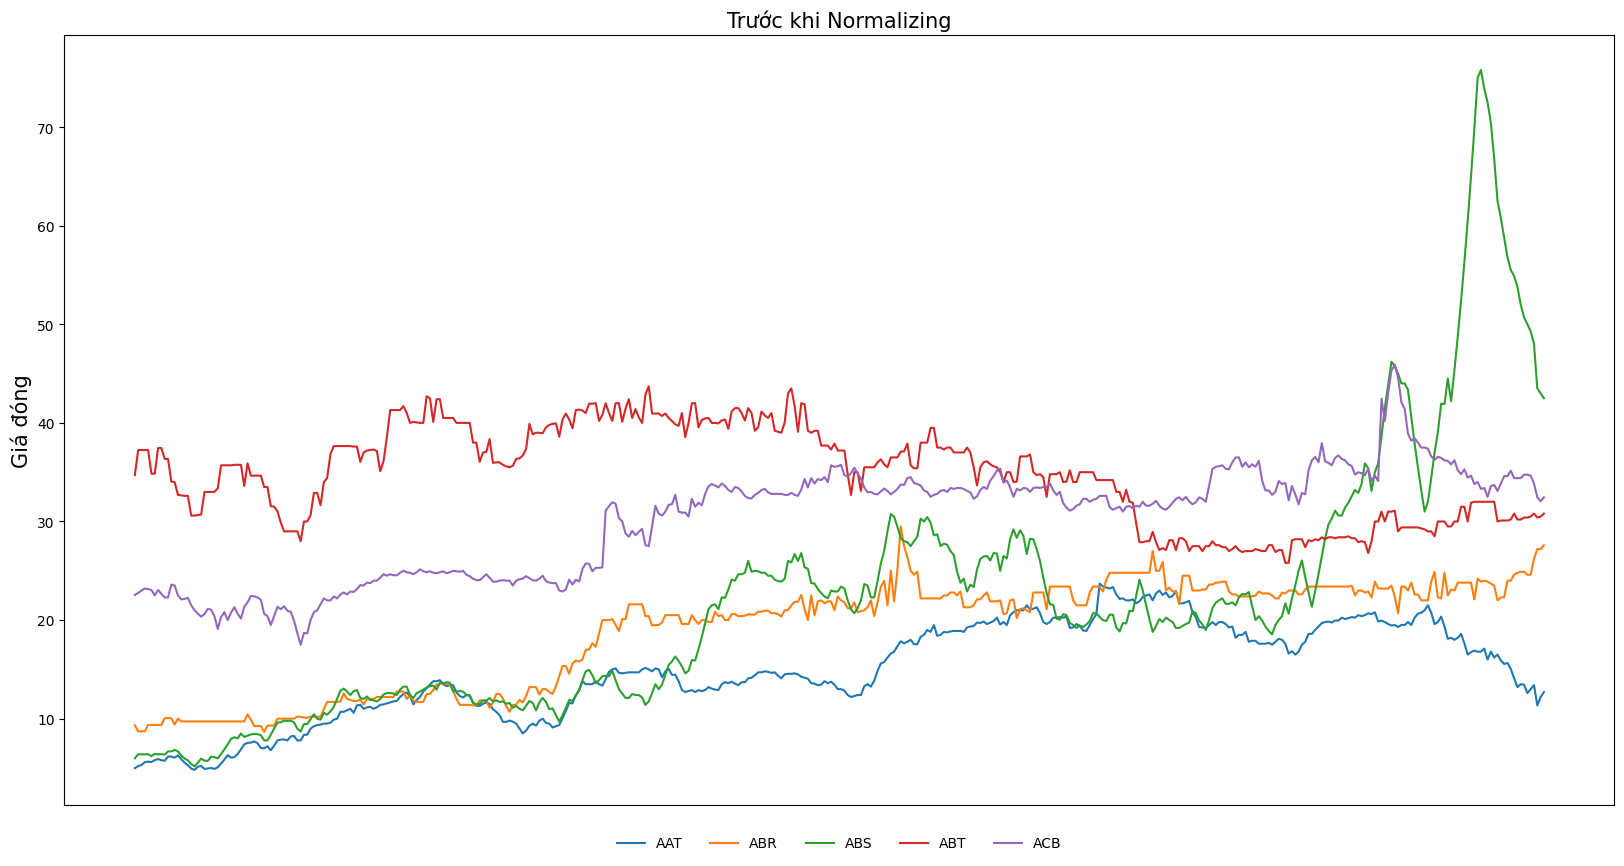

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

for i in range(len(data)):
    ax.plot(columns_name,data[i],label=stock_name[i]) #setup từng stock lên plot

ax.legend(loc='center',bbox_to_anchor=(0.5, -0.05),borderaxespad=0,ncol=len(data),frameon=False) #setup chú thích từng stock
plt.xticks([])
plt.title('Trước khi Normalizing',fontsize=15)
plt.ylabel("Giá đóng",fontsize=15)
plt.show()

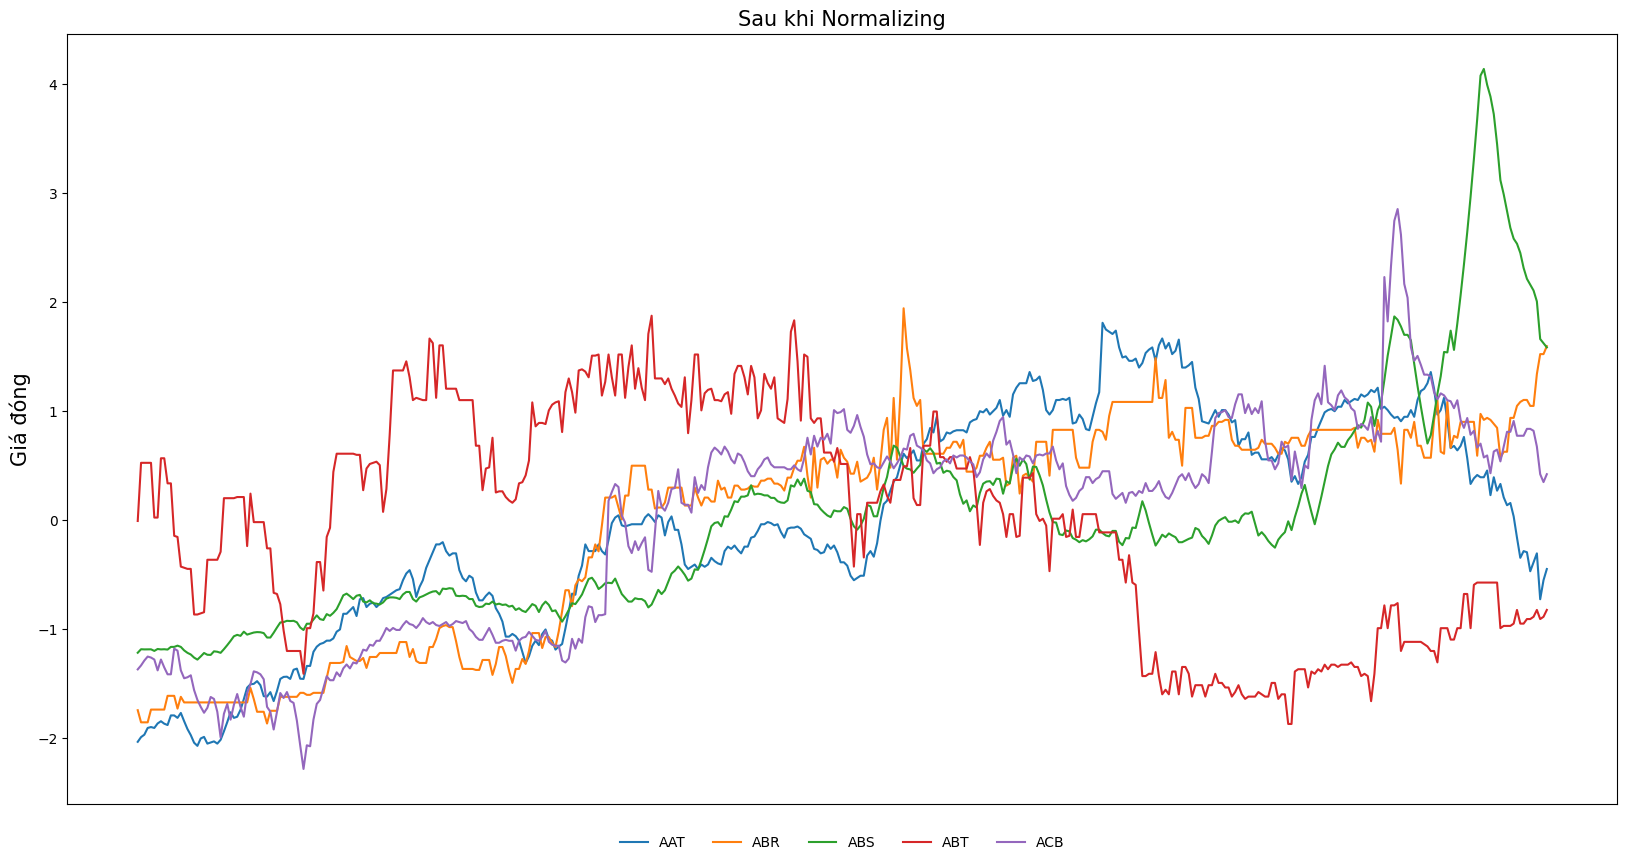

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

for i in range(len(dataset)):
    ax.plot(columns_name,dataset[i],label=stock_name[i])

ax.legend(loc='center',bbox_to_anchor=(0.5, -0.05),borderaxespad=0,ncol=len(dataset),frameon=False)
plt.xticks([])
plt.title('Sau khi Normalizing',fontsize=15)
plt.ylabel("Giá đóng",fontsize=15)
plt.show()

# Câu 3

## Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

## Đọc data và chuyển n file csv thành 1 dataframe

In [ ]:
def convertCSVToDataframe(path, number):
    # Tạo ra mảng để lưu kết quả
    prices = []

    list_path = os.listdir(path) #đọc tất cả file trong path
    for i in range(number):
        file_csv = f"{path}/{list_path[i]}" #tên file
        stock_name = list_path[i].split('_')[0] #Lấy name của stock

        df = pd.read_csv(file_csv, header=0, index_col=0) #đọc file csv
        df.rename(columns={'Đóng cửa':stock_name}, inplace=True) #rename columns price thành stock symbols
        data = df[stock_name] #lấy giá trị price

        prices.append(data)

    return prices

Toàn bộ mã chứng khoán (100 mã) được cào ở câu 1

In [ ]:
series_100 = None
path = '/content/drive/MyDrive/Data Mining/dataset'
prices_100 = convertCSVToDataframe(path, 100)
series_100 = pd.DataFrame(prices_100) #tạo dataframe từ 100 mã chứng khoán đã cào từ câu 1
series_100.head(10)

Ngày,20/12/2022,19/12/2022,16/12/2022,15/12/2022,14/12/2022,13/12/2022,12/12/2022,09/12/2022,08/12/2022,07/12/2022,...,15/01/2020,14/01/2020,13/01/2020,10/01/2020,09/01/2020,08/01/2020,07/01/2020,06/01/2020,03/01/2020,02/01/2020
AAT,"4,98","5,19","5,30","5,60","5,64","5,60","5,80","5,90","5,79","5,73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABR,"9,33","8,72","8,72","8,72","9,36","9,36","9,36","9,36","9,36","10,05",...,"16,00","13,60","13,60","13,60","13,40","13,90","13,70","14,10","13,80","12,10"
ABS,"5,98","6,40","6,38","6,38","6,39","6,20","6,43","6,38","6,40","6,36",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABT,"34,70","37,25","37,25","37,25","37,25","34,85","34,85","37,45","37,45","36,35",...,"33,20","34,40","34,40","36,95","36,00","36,00","36,00","34,00","34,00","33,70"
ACB,"22,55","22,75","23,00","23,20","23,15","23,05","22,50","23,05","22,65","22,30",...,"23,30","23,50","22,90","22,70","22,40","22,10","22,50","22,50","23,00","23,00"
ACC,"11,30","11,40","11,25","11,25","11,20","11,00","11,10","10,95","11,00","10,85",...,"20,50","19,90","19,40","19,40","18,90","19,00","19,00","19,00","19,00","18,90"
ACG,"34,50","35,30","35,50","35,50","35,80","35,20","35,30","35,20","34,80","34,80",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACL,"11,70","12,20","11,75","11,75","12,00","12,15","12,15","11,40","11,55","11,90",...,"21,00","22,40","22,60","22,60","22,30","22,40","22,60","22,75","23,00","23,20"
ADG,"27,25","28,95","29,15","29,15","29,30","29,00","29,00","29,00","29,00","27,50",...,"90,80","90,20","89,20","90,00","90,40","90,20","89,80","93,20","89,80","90,00"
ADS,"10,45","10,70","10,50","10,25","10,20","10,40","10,40","10,40","10,85","10,90",...,"11,00","11,05","11,20","11,25","11,35","11,40","11,55","11,80","12,00","11,55"


## Xử lý dữ liệu trên toàn bộ mã chứng khoán

In [ ]:
# Kiểm tra giá trị null trong dataset trước khi xử lý
series_100.isnull().sum()

Ngày
20/12/2022    0
19/12/2022    0
16/12/2022    0
15/12/2022    0
14/12/2022    0
             ..
08/01/2020    9
07/01/2020    9
06/01/2020    9
03/01/2020    9
02/01/2020    9
Length: 743, dtype: int64

In [ ]:
'''
  Có 2 stock có price == NaN cho biết tại không có price tại khoảng thời gian đó
  Cần được drop các khoảng thời gian để clean dữ liệu
'''
series_100 = series_100.dropna(axis=1) #drop giá trị NaN theo cột
series_100.head(100)

Ngày,20/12/2022,19/12/2022,16/12/2022,15/12/2022,14/12/2022,13/12/2022,12/12/2022,09/12/2022,08/12/2022,07/12/2022,...,16/12/2021,15/12/2021,14/12/2021,13/12/2021,10/12/2021,09/12/2021,08/12/2021,07/12/2021,06/12/2021,03/12/2021
AAT,"4,98","5,19","5,30","5,60","5,64","5,60","5,80","5,90","5,79","5,73",...,"18,75","18,85","18,90","18,90","18,90","18,80","19,25","19,35","19,40","19,75"
ABR,"9,33","8,72","8,72","8,72","9,36","9,36","9,36","9,36","9,36","10,05",...,"22,50","22,80","22,80","22,50","22,90","21,30","21,30","21,30","21,50","22,10"
ABS,"5,98","6,40","6,38","6,38","6,39","6,20","6,43","6,38","6,40","6,36",...,"27,65","27,00","26,60","24,90","23,80","24,20","22,90","23,60","23,35","25,10"
ABT,"34,70","37,25","37,25","37,25","37,25","34,85","34,85","37,45","37,45","36,35",...,"37,50","37,50","37,00","37,00","37,00","37,00","37,50","37,00","35,50","33,65"
ACB,"22,55","22,75","23,00","23,20","23,15","23,05","22,50","23,05","22,65","22,30",...,"33,00","33,40","33,30","33,40","33,40","33,30","33,10","32,95","32,30","32,55"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DRL,"65,10","66,50","66,50","67,80","67,90","70,00","69,80","70,10","70,10","70,20",...,"64,60","64,60","64,60","64,60","64,60","69,40","69,40","69,40","69,40","69,40"
DSN,"50,60","50,90","51,00","51,10","51,00","51,10","49,50","49,30","49,15","48,70",...,"47,50","47,95","48,00","48,50","48,70","48,85","48,00","47,40","46,50","46,80"
DTA,"5,33","5,66","5,89","5,88","5,91","5,79","5,71","5,91","5,93","5,95",...,"23,00","22,60","23,80","23,95","23,20","23,50","23,50","22,75","22,75","24,45"
DTL,"26,60","26,20","26,20","26,20","26,50","27,00","27,00","27,00","26,50","26,20",...,"35,00","35,00","35,20","35,50","35,50","35,50","35,50","34,50","34,20","34,50"


In [ ]:
# Kiểm tra giá trị null trong dataset sau khi xử lý
series_100.isnull().sum()

Ngày
20/12/2022    0
19/12/2022    0
16/12/2022    0
15/12/2022    0
14/12/2022    0
             ..
09/12/2021    0
08/12/2021    0
07/12/2021    0
06/12/2021    0
03/12/2021    0
Length: 242, dtype: int64

In [ ]:
stock_name_100 = series_100.index.values #lấy stock name
print(stock_name_100)

['AAT' 'ABR' 'ABS' 'ABT' 'ACB' 'ACC' 'ACG' 'ACL' 'ADG' 'ADS' 'AGG' 'AGM'
 'AGR' 'AMD' 'ANV' 'APC' 'APG' 'APH' 'ASG' 'ASM' 'ASP' 'AST' 'BAF' 'BBC'
 'BCE' 'BCG' 'BCM' 'BFC' 'BHN' 'BIC' 'BID' 'BKG' 'BMC' 'BMI' 'BMP' 'BRC'
 'BSI' 'BTP' 'BTT' 'BVH' 'BWE' 'C32' 'C47' 'CAV' 'CCI' 'CCL' 'CDC' 'CHP'
 'CIG' 'CII' 'CKG' 'CLC' 'CLL' 'CLW' 'CMG' 'CMV' 'CMX' 'CNG' 'COM' 'CRC'
 'CRE' 'CSM' 'CSV' 'CTD' 'CTF' 'CTG' 'CTI' 'CTR' 'CTS' 'CVT' 'D2D' 'DAG'
 'DAH' 'DAT' 'DBC' 'DBD' 'DBT' 'DC4' 'DCL' 'DCM' 'DGC' 'DGW' 'DHA' 'DHC'
 'DHG' 'DHM' 'DIG' 'DLG' 'DMC' 'DPG' 'DPM' 'DPR' 'DQC' 'DRC' 'DRH' 'DRL'
 'DSN' 'DTA' 'DTL' 'DTT']


In [ ]:
print(series_100.shape)

(100, 242)


In [ ]:
series_100 = series_100.replace(',','.',regex=True).astype(float) #fit tiêu chuẩn ',' -> '.' để transfer thành số
columns_name_100 = series_100.columns #lấy ngày

# Mảng data có 100 chiều
data_100 = [[]]*100
for i in range(len(data_100)):
    ## Lấy toàn bộ giá trị của mã i và cho vào data tại vị trí i
    data_100[i] = series_100.iloc[i].values

# In ra 100 phần tử đầu của mảng data của mã chứng khoán cuối cùng của dataframe
print(data_100[99][:100])

[11.9  11.9  11.9  11.15 11.15 11.15 11.15 11.15 11.8  11.05 11.05 11.05
 11.05 11.65 11.65 11.65 11.65 11.65 12.4  11.6  12.45 12.45 11.65 10.9
 10.9  10.9  11.6  11.6  12.45 12.45 11.65 12.5  12.5  12.5  12.5  13.4
 12.6  12.6  12.6  12.6  13.5  13.5  12.65 12.65 12.65 12.65 12.65 12.65
 12.65 12.65 12.65 12.65 11.85 11.85 11.85 12.65 12.65 12.65 13.25 13.25
 13.25 13.25 13.25 13.25 13.25 13.25 13.25 13.25 13.25 13.25 13.25 13.25
 13.25 13.25 13.2  13.2  13.   13.   12.7  12.7  12.7  12.7  13.45 13.45
 13.45 14.3  15.35 15.35 15.35 14.8  15.   14.25 15.3  15.3  15.3  14.95
 14.4  13.5  12.75 13.6 ]


## Chuẩn hóa dữ liệu bằng TimeSeriesScalerMeanVariance trên toàn bộ mã chứng khoán

In [ ]:
'''
  sử dụng time series scaler mean variance
  mean (trung bình) = 0. và standard (độ lệch chuẩn) 1.
'''
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)

dataset_100 = scaler.fit_transform(data_100)

print(dataset_100.shape)
print(dataset_100[0][:10]) #kết quả sau khi scaler

(100, 242, 1)
[[-1.85228537]
 [-1.79670795]
 [-1.76759597]
 [-1.68819965]
 [-1.67761348]
 [-1.68819965]
 [-1.63526878]
 [-1.60880334]
 [-1.63791532]
 [-1.65379458]]


## Giảm số chiều time series xuống còn 40

In [ ]:
# Giảm số time series thành 40
X_train_elbow = TimeSeriesResampler(sz=40).fit_transform(dataset)
size = X_train_elbow.shape[1]
print(size)
print(X_train_elbow.shape)

40
(5, 40, 1)


In [ ]:
# Giảm số time series thành 40
X_train = TimeSeriesResampler(sz=40).fit_transform(dataset_100)
size = X_train.shape[1]
print(size)
print(X_train.shape)

40
(100, 40, 1)


## Áp dụng phương pháp Elbow để tìm ra k tốt nhất cho 3 dạng k-means

### Standard Euclidean k-means

In [ ]:
# Mảng gốc để lưu kết quả
stdEuclidKmean_WCSS = []
# Chọn k chạy từ 1 đến 10
k = []
for i in range(1, 11):
    k.append(i)

for i in k:
    stdEuclidKmean_i = TimeSeriesKMeans(n_clusters = i, # Gom thành i cụm (Dựa trên phương pháp Elbow)
                                  max_iter = 50, # Số lần lặp tối đa trong 1 lần chạy
                                  verbose = True, # Nếu True thì in kết quả và ngược lại
                                  random_state=0
                                )
    # fit data với stdEuclidKmean_i
    stdEuclidKmean_i.fit(X_train_elbow)

    # inertia_: Tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần nhất của chúng,
    # được tính theo trọng số của mẫu nếu được cung cấp.
    stdEuclidKmean_WCSS.append(stdEuclidKmean_i.inertia_)

30.513 --> 21.886 --> 21.886 --> 
9.596 --> 6.171 --> 6.171 --> 
5.303 --> 2.620 --> 2.620 --> 
1.852 --> 0.926 --> 0.926 --> 
0.000 --> 0.000 --> 
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cl

In [ ]:
print(stdEuclidKmean_WCSS)

[21.88605753297733, 6.171426202601776, 2.620237072830151, 0.9259468295371279, 0.0, inf, inf, inf, inf, inf]


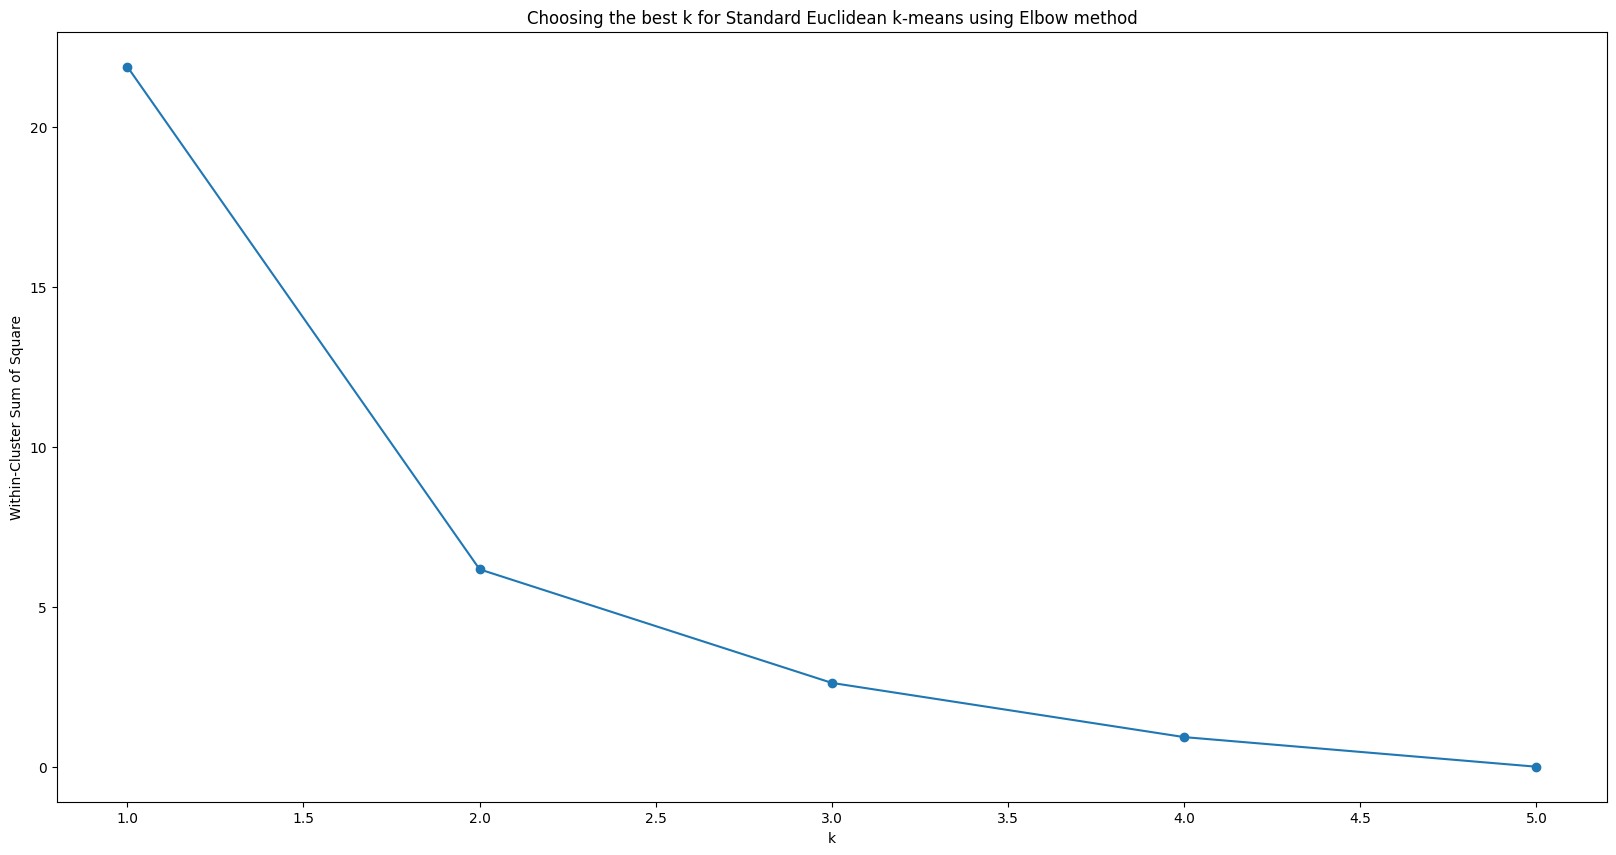

In [ ]:
# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
# Vẽ kết quả
plt.plot(k, stdEuclidKmean_WCSS, marker = 'o')
# Hiên thị tên cột, tên dòng và tên tiêu đề
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Choosing the best k for Standard Euclidean k-means using Elbow method')
plt.show()

### DBA k-means

In [ ]:
# Mảng gốc để lưu kết quả
dbaKmeans_WCSS = []
# Chọn k chạy từ 1 đến 10
k = []
for i in range(1, 11):
    k.append(i)

for i in k:
    print('\t\n\t\nk = ',i)
    dbaKmeans_i = TimeSeriesKMeans(n_clusters = i, # Gom thành i cụm
                          n_init=2, # Số lần thuật toán k-means sẽ được chạy với các centroid seed khác nhau.
                                    # Kết quả cuối cùng sẽ là đầu ra tốt nhất của n_init lần chạy liên tiếp theo quán tính.
                                    # Giá trị mặc định là 1
                          metric="dtw", # Số liệu được sử dụng cho cả phân công cụm và tính toán barycenter.
                                        # Nếu "dtw", DBA được sử dụng để tính toán barycenter.
                                        # Mặc định là euclidean; Các độ đo (euclidean, dtw, softdtw)
                          verbose=True, # True thì hiển thị kết quả
                          max_iter_barycenter=10, # Số lần lặp lại cho quá trình tính toán barycenter.
                                                # Chỉ được sử dụng nếu metric là dtw hoặc softdtw.
                          random_state=0)
    # fit data với stdEuclidKmean_i
    dbaKmeans_i.fit(X_train_elbow)
    # inertia_: Tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần nhất của chúng,
    # được tính theo trọng số của mẫu nếu được cung cấp.
    dbaKmeans_WCSS.append(dbaKmeans_i.inertia_)

	
	
k =  1
Init 1
12.430 --> 7.178 --> 7.178 --> 
Init 2
11.207 --> 7.711 --> 7.711 --> 
	
	
k =  2
Init 1
3.399 --> 2.207 --> 2.207 --> 
Init 2
6.920 --> 2.536 --> 2.536 --> 
	
	
k =  3
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

1.907 --> 1.121 --> 1.121 --> 
Init 2
2.427 --> 1.217 --> 1.217 --> 
	
	
k =  4
Init 1
0.935 --> 0.478 --> 0.478 --> 
Init 2
0.935 --> 0.461 --> 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

0.461 --> 
	
	
k =  5
Init 1
0.000 --> 0.000 --> 
Init 2
0.000 --> 0.000 --> 
	
	
k =  6
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Resumed because of empty cluster
	
	
k =  7
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
	
	
k =  8
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
	
	
k =  9
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
	
	
k =  10
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
print(dbaKmeans_WCSS)

[7.178006311619282, 2.2073045719395106, 1.1210427655370023, 0.46089852149760285, 0.0, inf, inf, inf, inf, inf]


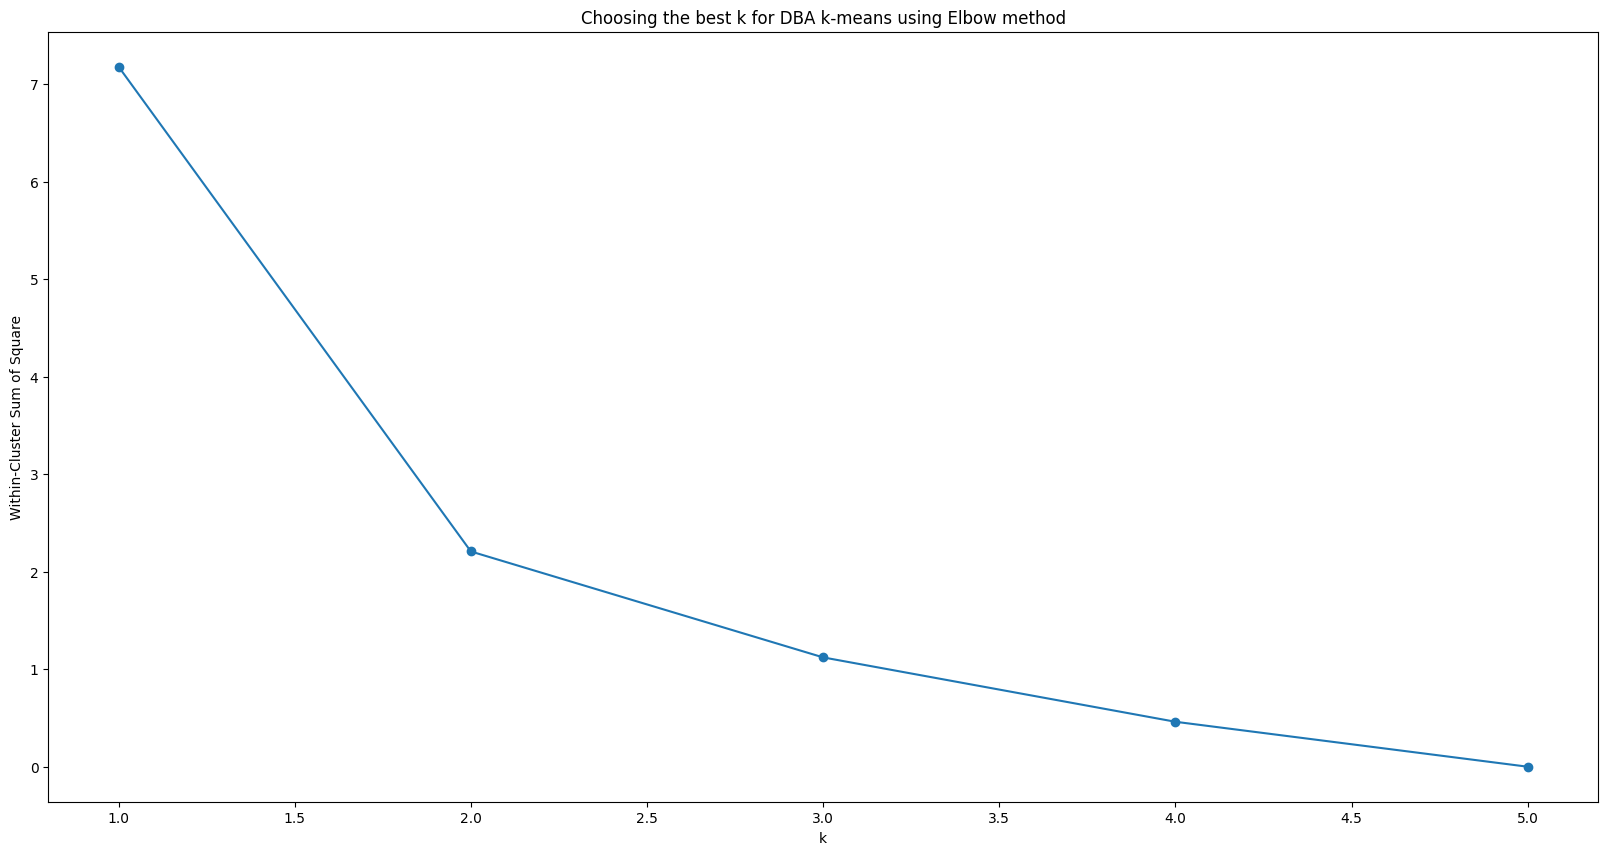

In [ ]:
# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
#
plt.plot(k, dbaKmeans_WCSS, marker = 'o')
# Hiên thị tên cột, tên dòng và tên tiêu đề
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Choosing the best k for DBA k-means using Elbow method')
plt.show()

### Soft-DTW k-means

In [ ]:
# Mảng gốc để lưu kết quả
softDTWKmeans_WCSS = []
# Chọn k chạy từ 1 đến 10
k = []
for i in range(1, 11):
    k.append(i)

for i in k:
    print('\t\n\t\nk = ',i)
    softDTWKmeans_i = TimeSeriesKMeans(n_clusters = i, # Phân cụm là i
                           metric="softdtw", # dạng bài toán (soft-dtw k-means)
                           metric_params={"gamma": 0.01}, # Các giá trị tham số cho chỉ số đã chọn.
                           # Đối với các số liệu chấp nhận song song hóa các tính toán ma trận khoảng cách chéo,
                           # khóa n_jobs được chuyển trong metric_params bị đối số n_jobs ghi đè.
                           verbose=True, # True sẽ hiển thị thông tin
                           random_state=0)
    # fit data với stdEuclidKmean_i
    softDTWKmeans_i.fit(X_train_elbow)
    # inertia_: Tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần nhất của chúng,
    # được tính theo trọng số của mẫu nếu được cung cấp.
    softDTWKmeans_WCSS.append(softDTWKmeans_i.inertia_)

	
	
k =  1
427.362 --> 65.162 --> 65.344 --> 64.733 --> 65.069 --> 64.886 --> 65.021 --> 64.952 --> 65.025 --> 64.958 --> 65.019 --> 64.969 --> 65.015 --> 64.980 --> 65.013 --> 64.986 --> 65.010 --> 64.991 --> 65.009 --> 64.995 --> 65.007 --> 64.997 --> 65.006 --> 64.999 --> 65.006 --> 65.001 --> 65.005 --> 65.002 --> 65.005 --> 65.002 --> 65.005 --> 65.005 --> 
	
	
k =  2
19.674 --> 6.248 --> 6.246 --> 6.246 --> 6.242 --> 6.245 --> 6.240 --> 6.241 --> 6.241 --> 6.240 --> 6.240 --> 6.241 --> 6.240 --> 6.240 --> 6.240 --> 6.240 --> 6.240 --> 6.240 --> 
	
	
k =  3
8.772 --> 1.841 --> 1.839 --> 1.838 --> 1.838 --> 1.837 --> 1.837 --> 1.837 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.836 --> 1.835 --> 1.835 --> 1.835 --> 1.835 --> 
	
	
k =  4
4.167 --> 0.445 --> 0.445 --> 0.445 --> 0.445 --> 0.445 --> 0.445 --> 0.445 --> 
	
	
k =  5
0.024 --> 0.029 --> 0.029 --> 0.029 --> 0.029 --> 
	
	
k =  6
Resumed because of empty cluster
Resumed because of emp

In [ ]:
print(softDTWKmeans_WCSS)

[65.00472841717439, 6.239875544049381, 1.8354529574702318, 0.44514370885498716, 0.029158052068914687, inf, inf, inf, inf, inf]


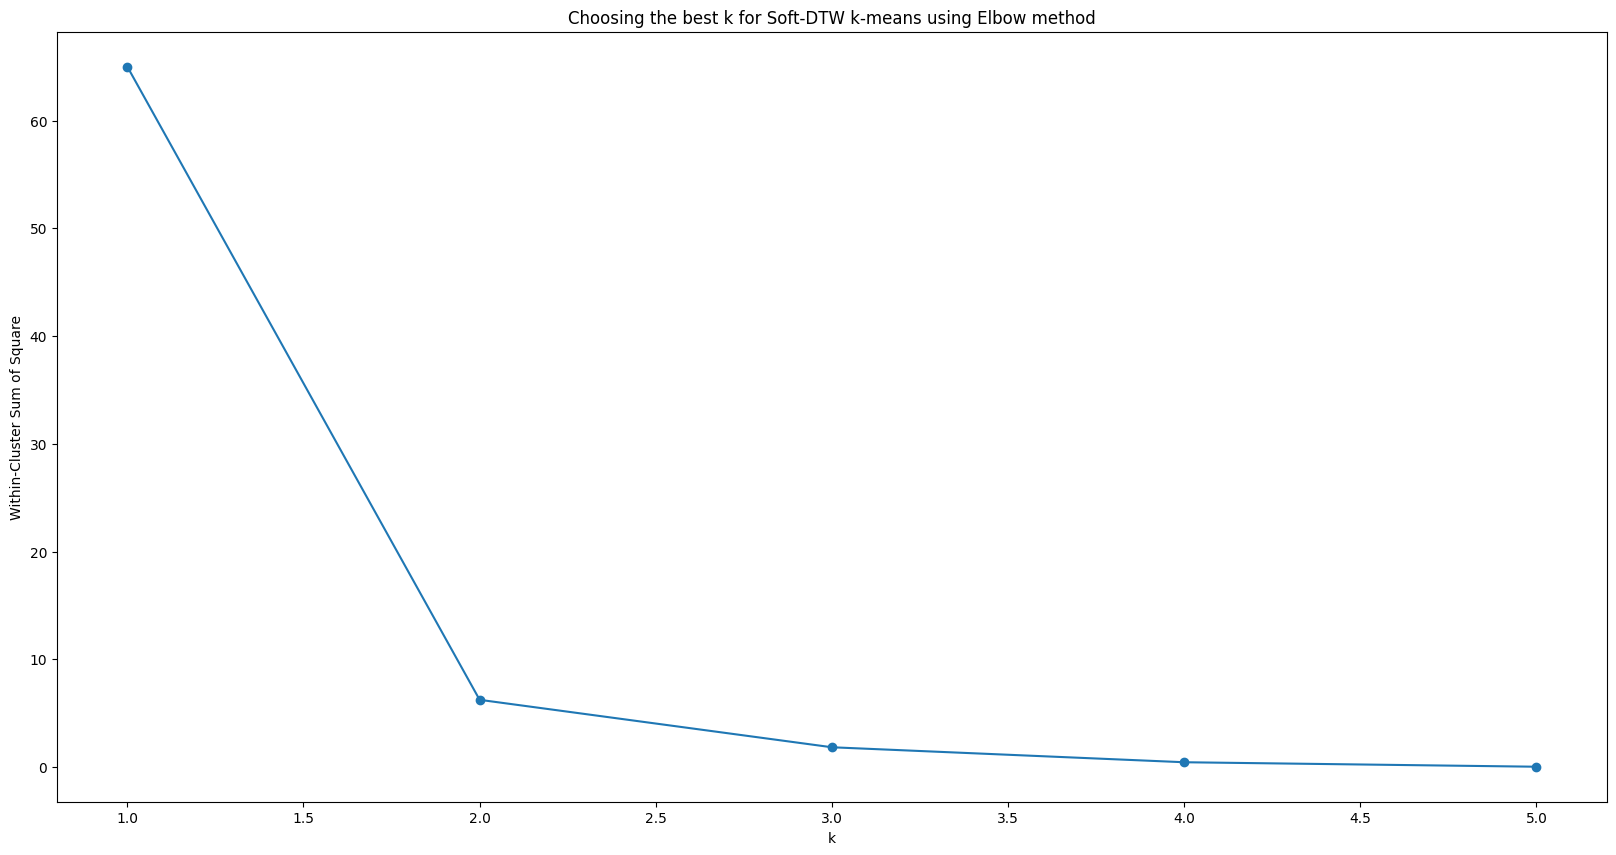

In [ ]:
# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
#
plt.plot(k, softDTWKmeans_WCSS, marker = 'o')
# Hiên thị tên cột, tên dòng và tên tiêu đề
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Choosing the best k for Soft-DTW k-means using Elbow method')
plt.show()

### Tìm ra k tối ưu

In [ ]:
def findTheBestK(arr):
    minMinus = arr[0] - arr[1]
    check = 0
    for i in range(1, len(arr)-1):
        if minMinus > np.subtract(arr[i], arr[i+1]):
            check = i
            minMinus = np.subtract(arr[i], arr[i+1])
    return check

In [ ]:
n_stdEuclidKmean = findTheBestK(stdEuclidKmean_WCSS)
n_dbaKmeans = findTheBestK(dbaKmeans_WCSS)
n_softDTWKmeans = findTheBestK(softDTWKmeans_WCSS)
print('Best k of Standard Euclidean k-means with k from 1 to 10:',n_stdEuclidKmean)
print('Best k of DBA k-means with k from 1 to 10:',n_dbaKmeans)
print('Best k of Soft-DTW k-means with k from 1 to 10:',n_softDTWKmeans)
n_stdEuclidKmean = n_dbaKmeans = n_softDTWKmeans = 4

Best k of Standard Euclidean k-means with k from 1 to 10: 4
Best k of DBA k-means with k from 1 to 10: 4
Best k of Soft-DTW k-means with k from 1 to 10: 4


C:\Users\Admin\AppData\Local\Temp\ipykernel_17440\1673556008.py:5: RuntimeWarning: invalid value encountered in subtract
  if minMinus > np.subtract(arr[i], arr[i+1]):


## Thực hiện phân cụm cho toàn bộ mã chứng khoán bằng k-means

### Standard Euclidean k-means

In [ ]:
print("Euclidean k-means")
#
stdEuclidKmean = TimeSeriesKMeans(n_clusters = n_stdEuclidKmean, # Gom thành 3 cụm (Dựa trên phương pháp Elbow)
                                  max_iter = 50, # Số lần lặp tối đa trong 1 lần chạy
                                  verbose = True, # Nếu True thì in kết quả và ngược lại
                                  random_state=0
                                  )
y_pred_stdEuclidKmean = stdEuclidKmean.fit_predict(X_train)
print()
print(y_pred_stdEuclidKmean.shape)
print('Kết quả dự đoán phân cụm bằng Standard Euclidean k-means: \n',y_pred_stdEuclidKmean)

Euclidean k-means
13.711 --> 9.671 --> 9.079 --> 8.838 --> 8.803 --> 8.803 --> 

(100,)
Kết quả dự đoán phân cụm bằng Standard Euclidean k-means: 
 [3 3 1 0 1 1 1 0 3 3 1 3 1 1 0 1 1 1 3 3 1 0 3 0 1 3 2 3 3 3 1 1 1 3 2 3 1
 3 0 0 0 3 1 3 0 1 2 2 1 1 1 3 3 0 0 3 3 0 0 1 3 3 0 1 0 1 1 3 1 1 3 1 3 1
 1 3 1 1 1 0 3 3 3 3 1 1 1 1 3 3 0 0 3 3 1 2 2 1 3 1]


### DBA k-means

In [ ]:
print("DBA k-means")
dbaKmeans = TimeSeriesKMeans(n_clusters = n_dbaKmeans, # Gom thành 3 cụm
                          n_init=5, # Số lần thuật toán k-means sẽ được chạy với các centroid seed khác nhau.
                                    # Kết quả cuối cùng sẽ là đầu ra tốt nhất của n_init lần chạy liên tiếp theo quán tính.
                                    # Giá trị mặc định là 1
                          metric="dtw", # Số liệu được sử dụng cho cả phân công cụm và tính toán barycenter.
                                        # Nếu "dtw", DBA được sử dụng để tính toán barycenter.
                                        # Mặc định là euclidean; Các độ đo (euclidean, dtw, softdtw)
                          verbose=True, # True thì hiển thị kết quả
                          max_iter_barycenter=10, # Số lần lặp lại cho quá trình tính toán barycenter.
                                                # Chỉ được sử dụng nếu metric là dtw hoặc softdtw.
                          random_state=0)


y_pred_dbaKmeans = dbaKmeans.fit_predict(X_train)
print()
print(y_pred_dbaKmeans.shape)
print('Kết quả dự đoán phân cụm bằng DBA k-means: \n',y_pred_dbaKmeans)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DBA k-means
Init 1


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


5.807 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.412 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.343 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.289 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.253 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.247 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.242 --> 4.242 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Init 2


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


6.961 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.671 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.517 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.359 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4.329 --> 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4.329 --> 
Init 3


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


6.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.287 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.211 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.195 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.195 --> 
Init 4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


6.573 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.194 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.032 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.030 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.030 --> 
Init 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


5.886 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.272 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.255 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


4.238 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


4.238 --> 

(100,)
Kết quả dự đoán phân cụm bằng DBA k-means: 
 [0 0 0 3 0 0 0 3 1 0 0 1 0 0 3 0 0 0 1 1 0 3 3 1 0 1 2 1 1 1 0 0 0 0 3 0 0
 1 3 1 3 1 0 1 3 0 2 3 1 1 0 1 1 3 1 1 1 3 3 0 0 1 3 1 2 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 3 1 1 1 1 0 0 0 0 1 0 3 1 1 1 0 2 2 0 1 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


### Soft-DTW k-means

In [ ]:
softDTWKmeans = TimeSeriesKMeans(n_clusters = n_softDTWKmeans, # Phân cụm là 3
                           metric="softdtw", # dạng bài toán (soft-dtw k-means)
                           metric_params={"gamma": 0.01}, # Các giá trị tham số cho chỉ số đã chọn.
                           # Đối với các số liệu chấp nhận song song hóa các tính toán ma trận khoảng cách chéo,
                           # khóa n_jobs được chuyển trong metric_params bị đối số n_jobs ghi đè.
                           verbose=True, # True sẽ hiển thị thông tin
                           random_state=0)
y_pred_softDTWKmeans = softDTWKmeans.fit_predict(X_train)
print()
print(y_pred_softDTWKmeans.shape)
print('Kết quả dự đoán phân cụm bằng DBA k-means: \n',y_pred_softDTWKmeans)

75.637 --> 33.959 --> 32.429 --> 31.771 --> 31.757 --> 31.739 --> 31.767 --> 31.758 --> 31.759 --> 31.755 --> 31.749 --> 31.750 --> 31.750 --> 31.750 --> 31.750 --> 31.750 --> 31.751 --> 31.750 --> 31.751 --> 31.750 --> 31.751 --> 31.751 --> 31.751 --> 31.751 --> 31.751 --> 31.751 --> 31.751 --> 

(100,)
Kết quả dự đoán phân cụm bằng DBA k-means: 
 [1 1 1 0 1 1 1 3 1 1 1 3 1 1 0 1 1 1 1 1 1 0 3 3 1 1 0 3 1 3 2 1 1 1 0 1 1
 1 0 3 0 1 1 1 0 1 0 0 1 3 2 3 1 0 3 3 1 0 3 1 1 1 3 3 0 1 1 3 1 2 1 1 3 1
 1 3 1 1 1 3 3 3 1 1 1 2 1 1 3 1 0 3 3 1 1 2 0 1 3 2]


## Vẽ đồ thị phân cụm của 3 dạng K-means

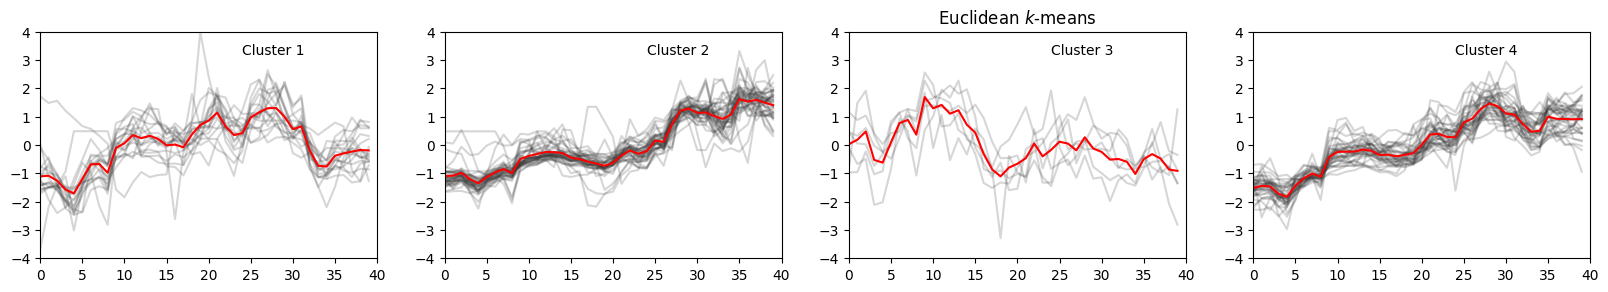

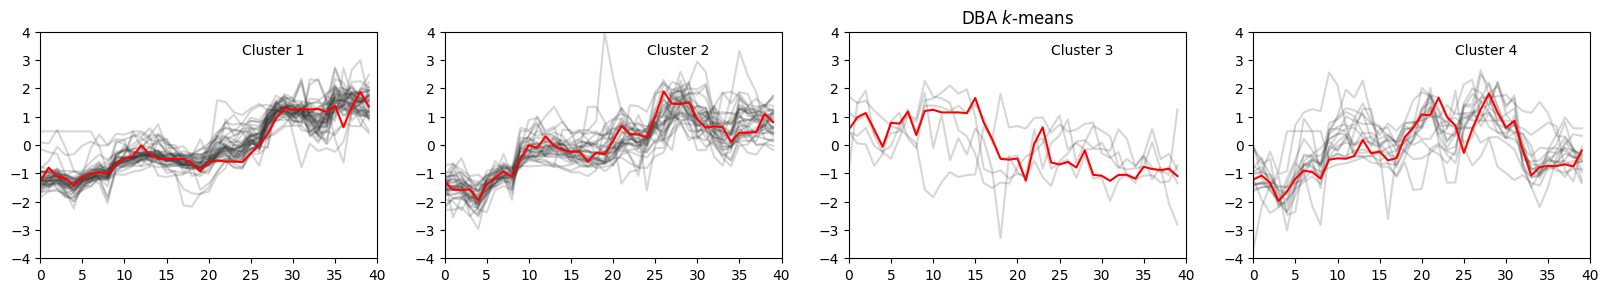

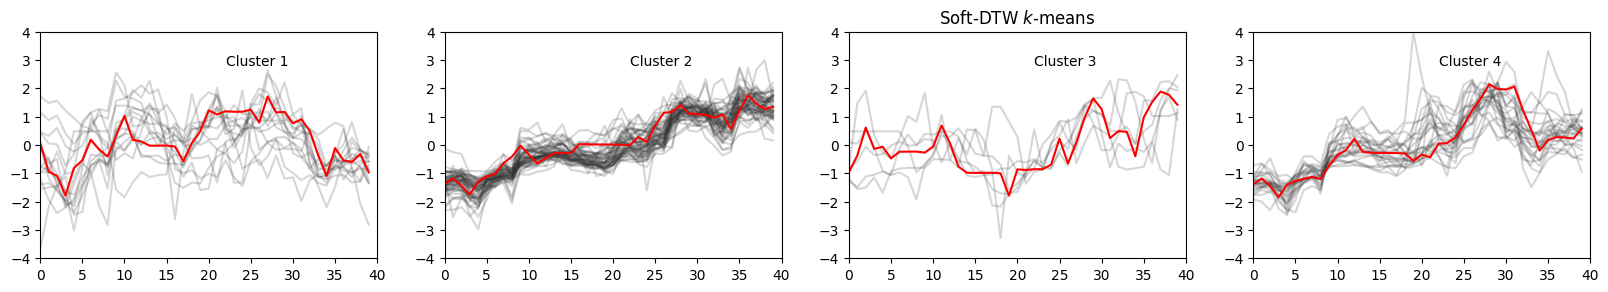

In [ ]:
# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
# Duyệt từ 0 -> n
for yi in range(n_stdEuclidKmean):
    # Vẽ ra n hình
    plt.subplot(3, n_stdEuclidKmean, yi + 1)
    for xx in X_train[y_pred_stdEuclidKmean == yi]:
        '''
            Vẽ stock price movements in each cluster ký hiệu là đường màu xám
        alpha = 0.2 là mức độ mờ của dòng
        c càng nhỏ thì màu xám càng đậm
        ravel() mảng phẳng liền kề (mảng 1D có tất cả các phần tử của mảng đầu vào và có cùng kiểu với nó)
        '''
        plt.plot(xx.ravel(), alpha=0.2, c='0.2')
    # Vẽ the center line of gray lines in each cluster ký hiệu là đường màu đỏ
    plt.plot(stdEuclidKmean.cluster_centers_[yi].ravel(), "r-")
    # 0 -> 90 cột x
    plt.xlim(0, size)
    # -4 -> 4 cột y
    plt.ylim(-4, 4)
    # Vị trí đặt chữ Cluster 1, Cluster 2 , Cluster 3, Cluster n
    # Nếu ko có transfrom thì text sẽ ở góc giữa bên trái của hình
    plt.text(0.6, 0.9,'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    # Hiển thị title tại vị trí trung tâm
    if yi == n_stdEuclidKmean//2:
        plt.title("Euclidean $k$-means")

# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
# Duyệt từ 0 -> n
for yi in range(n_dbaKmeans):
    # Vẽ ra n hình
    plt.subplot(3, n_dbaKmeans, yi + 1 + n_dbaKmeans)
    for xx in X_train[y_pred_dbaKmeans == yi]:
        '''
            Vẽ stock price movements in each cluster ký hiệu là đường màu xám
        alpha = 0.2 là mức độ mờ của dòng
        c càng nhỏ thì màu xám càng đậm
        ravel() mảng phẳng liền kề (mảng 1D có tất cả các phần tử của mảng đầu vào và có cùng kiểu với nó)
        '''
        plt.plot(xx.ravel(), alpha=0.2, c='0.2')
    # Vẽ the center line of gray lines in each cluster ký hiệu là đường màu đỏ
    plt.plot(dbaKmeans.cluster_centers_[yi].ravel(), "r-")
    # 0 -> 90 cột x
    plt.xlim(0, size)
    # -4 -> 4 cột y
    plt.ylim(-4, 4)
    # Vị trí đặt chữ Cluster 1, Cluster 2 , Cluster 3, Cluster n
    # Nếu ko có transfrom thì text sẽ ở góc giữa bên trái của hình
    plt.text(0.6, 0.9,'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
    # Hiển thị title tại vị trí trung tâm
    if yi == n_dbaKmeans // 2:
        plt.title("DBA $k$-means")

# Tạo ra figure mới với kích thước 20,10
plt.figure(figsize=(20,10))
# Duyệt từ 0 -> n
for yi in range(n_softDTWKmeans):
    # Vẽ n hình
    plt.subplot(3, n_softDTWKmeans, yi + 1 + n_softDTWKmeans*2)
    for xx in X_train[y_pred_softDTWKmeans == yi]:
        '''
            Vẽ stock price movements in each cluster ký hiệu là đường màu xám
        alpha = 0.2 là mức độ mờ của dòng
        c càng nhỏ thì màu xám càng đậm
        ravel() mảng phẳng liền kề (mảng 1D có tất cả các phần tử của mảng đầu vào và có cùng kiểu với nó)
        '''
        plt.plot(xx.ravel(), alpha=0.2, c='0.2')
    # Vẽ the center line of gray lines in each cluster ký hiệu là đường màu đỏ
    plt.plot(softDTWKmeans.cluster_centers_[yi].ravel(), "r-")
    # 0 -> 40 cho cột x
    plt.xlim(0, size)
    # -4 đến 4 cho cột y
    plt.ylim(-4, 4)
    # Vị trí đặt chữ Cluster 1, Cluster 2 , Cluster 3, Cluster n
    # Nếu ko có transfrom thì text sẽ ở góc giữa bên trái của hình
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    # Hiển thị title tại vị trí trung tâm
    if yi == n_softDTWKmeans // 2:
        plt.title("Soft-DTW $k$-means")

#Hiển thị chi tiết cột y (-4, -3, -2, -1, 0, 1, 2, 3, 4)
#plt.tight_layout()
#plt.show()

# Câu 4

## Import thư viện  

In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
import datetime as dt

## Chọn mã sotck

In [ ]:
#lấy dữ liệu từ 01-01-2020 đén 1-05-2022
df=pd.read_csv('ACB_2020-2022_cau4.csv')
df.head()

,Ngày,Thay đổi,Mở cửa,Cao nhất,Thấp nhất,Đóng cửa,Trung bình
0,31/12/2021,"+0,60/+1,77%","34,00","34,55","34,00","34,50","34,36"
1,30/12/2021,"+0,10/+0,30%","33,70","34,00","33,50","33,90","33,83"
2,29/12/2021,"+0,15/+0,45%","33,85","34,20","33,70","33,80","33,93"
3,28/12/2021,"+0,50/+1,51%","33,15","33,75","33,05","33,65","33,43"
4,27/12/2021,"+0,15/+0,45%","33,30","33,30","32,90","33,15","33,05"


## Tiền xử lý dữ liệu


In [ ]:
#Chuyển các cột có giá trị object thành float(bị trùng nếu chạy lại)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '.').astype(float)
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '.').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '.').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '.').astype(float)
df['Trung bình'] = df['Trung bình'].str.replace(',', '.').astype(float)
dataset=df['Ngày'] = pd.to_datetime(df['Ngày'])

#lấy 2 cột ngày và đóng cửa
feature =['Đóng cửa']
predict =['Đóng cửa']
dataset=df.filter(['Ngày','Đóng cửa'])

dataset.head()

,Ngày,Đóng cửa
0,2021-12-31,34.50
1,2021-12-30,33.90
2,2021-12-29,33.80
3,2021-12-28,33.65
4,2021-12-27,33.15


## Tạo tập train ,test

In [ ]:
#Chia dataset thành tập train và test tỉ lệ 7:3
training_size = int(len(dataset)*0.7)

In [ ]:
#tạo tập training_set ,testing_set để xử lý dữ liệu
training_set = dataset.iloc[:training_size]
testing_set= dataset.iloc[training_size:]

training_set_new = dataset.iloc[:training_size]
testing_set_new = dataset.iloc[training_size:]


## Scale dữ liệu

In [ ]:
#Chuẩn hóa tập feature
scaler_feature = MinMaxScaler()
scaler_feature.fit(training_set_new[feature])
training_set_new[feature] = scaler_feature.transform(training_set_new[feature])

testing_set_new[feature] = scaler_feature.transform(testing_set_new[feature])

In [ ]:
#Chuẩn hóa tập predict
scaler_predict = MinMaxScaler()
scaler_predict.fit(training_set_new[predict])
training_set_new[predict] = scaler_predict.transform(training_set_new[predict])

testing_set_new[predict] = scaler_predict.transform(testing_set_new[predict])


## Tạo x_train , y_train , x_test ,y_test

In [ ]:
#hàm tạo X_train, y_train với đầu vào là :
#tập dataset, time(khoảng thời gian dự đoán), x là feature , y là predict
def create_X_y_train(dataset, time, x, y):
    X_train = []
    y_train = []
    # Duyệt từ khoảng thời gian cần dự đoán đến kích thước của data
    for i in range(time, len(dataset)):
        X_train.append(dataset[x+y].iloc[i - time : i])
        y_train.append(dataset[y].iloc[i])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_X_y_train(training_set_new, 120, feature, predict)

In [ ]:
#hàm tạo X_test, y_test với đầu vào là :
#tập dataset, time(khoảng thời gian dự đoán ), x là feature , y là predict , tập train
def create_X_y_test(dataset, time, x, y, train_size):
    X_test = []
    y_test = []
    dataset = dataset.iloc[train_size - time:, :]
    sc_x = MinMaxScaler().fit(dataset[x])
    dataset[x] = sc_x.transform(dataset[x])
    sc_y = MinMaxScaler().fit(dataset[y])
    dataset[y] = sc_y.transform(dataset[y])

    for i in range(time, len(dataset)):
        X_test.append(dataset[x+y].iloc[i - time : i])
        y_test.append(dataset[y].iloc[i])
    return np.array(X_test), np.array(y_test)

X_test, y_test = create_X_y_test(dataset, 120, feature, predict, training_size)

## Xây dựng model LSTM

In [ ]:
# Áp dụng model LSTM
model = Sequential()

model.add(LSTM(50,input_shape = X_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(units = 1))


# Compilling LSTM
model.compile(optimizer = "adam", loss = "mse")
model.summary()

#fit model
historyLSTM = model.fit(X_train,y_train, epochs = 50, validation_data=(X_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 3s 142ms/step - loss: 0.0500 - val_loss: 0.0076
Epoch 2/50
8/8 [==============================] - 0s 61ms/step - loss: 0.0208 - val_loss: 0.0076
Epoch 3/50
8/8 [==============================] - 0s 60ms/step - loss: 0.0122 - val_loss: 0.0085
Epoch 4/50
8/8 [======

In [ ]:
#xây dựng y dự đoán
y_predict = model.predict(X_test)
sc = MinMaxScaler().fit(testing_set[predict])
y_predict_new = sc.inverse_transform(y_predict)
price_open = testing_set["Đóng cửa"].values

5/5 [==============================] - 1s 15ms/step


In [ ]:
#insert cột dự dư đoán vào bảng để vẽ hình (bị trùng nếu chạy lại)
testing_set.insert(loc=2, column='predict Open 4 month', value=y_predict_new)
testing_set.head()

,Ngày,Đóng cửa,predict Open 4 month
347,2020-10-08,0.478088,0.378222
348,2020-07-08,0.470120,0.357502
349,2020-06-08,0.478088,0.338233
350,2020-05-08,0.494024,0.323660
351,2020-04-08,0.470120,0.315198


## Vẽ hình

Text(0.5, 1.0, 'Biểu đồ giá ')

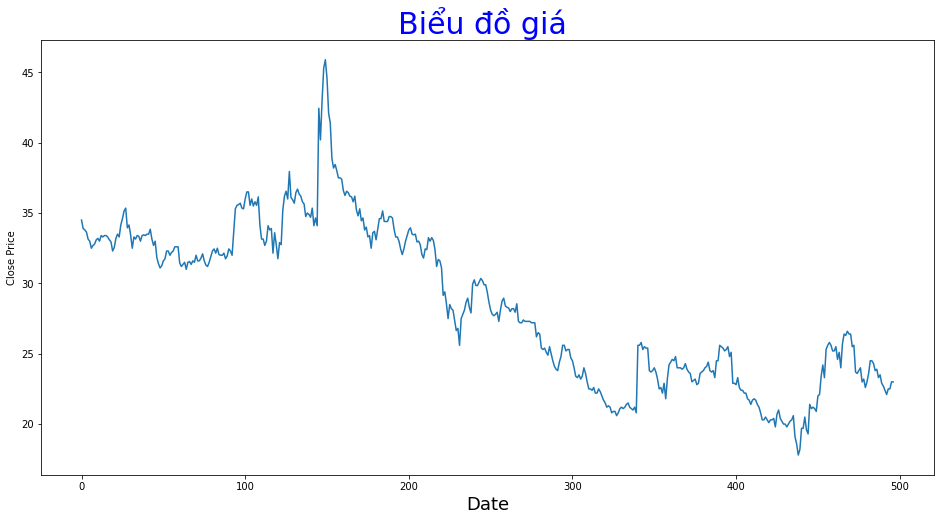

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Đóng cửa'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.title("Biểu đồ giá ",size=30, color='Blue')

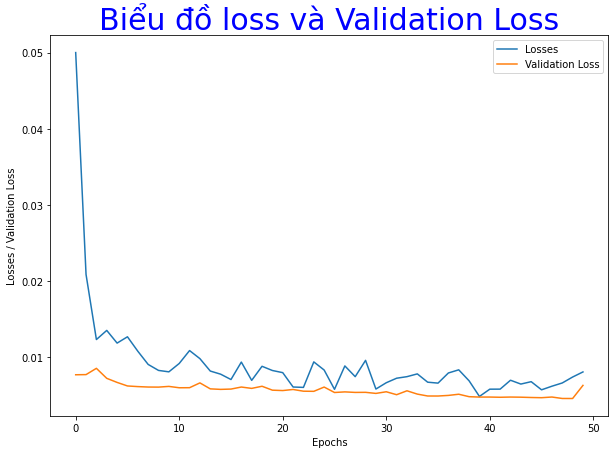

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(historyLSTM.history["loss"])
plt.plot(historyLSTM.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses / Validation Loss")
plt.title("Biểu đồ loss và Validation Loss",size=30, color='Blue')
plt.legend(['Losses','Validation Loss'])
plt.show()

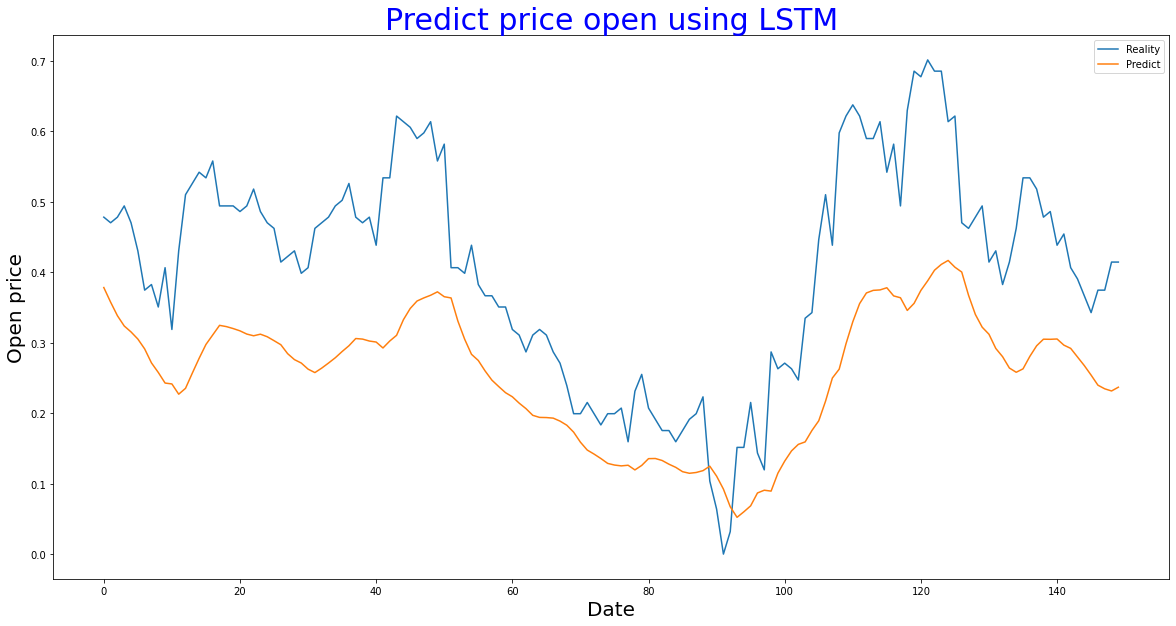

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Predict price open using LSTM",size=30, color='Blue')
plt.xlabel('Date',size=20)
plt.ylabel('Open price',size=20)
plt.plot(price_open)
plt.plot(y_predict_new)
plt.legend(['Reality', 'Predict'])
plt.show()

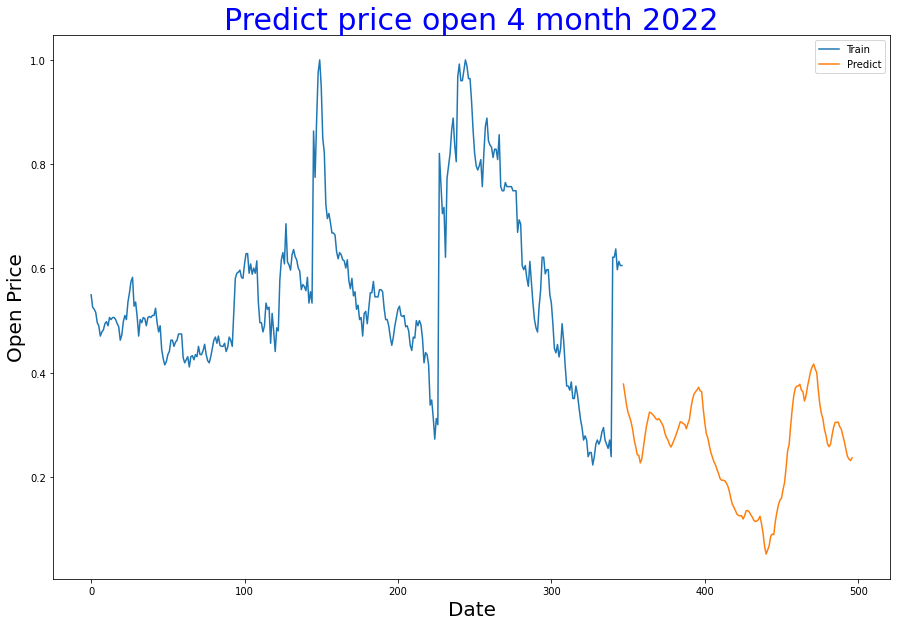

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(training_set[["Đóng cửa"]])
plt.plot(testing_set[["predict Open 4 month"]])
plt.title('Predict price open 4 month 2022',size=30, color='Blue')
plt.xlabel('Date',size=20)
plt.ylabel('Open Price',size=20)
plt.legend(['Train','Predict'])
plt.show()